# 畳み込みニューラルネットワーク

## 畳み込み層

- 畳み込み層: CNN（Convolutional Neural Network）で新たに取り入れられる層の一つ。
- 特徴マップ(feature map): 畳み込み層における入出力データのこと
- 入力特徴マップ(input feature map): 畳み込み層における入力データのこと
- 出力特徴マップ(output feature map): 畳み込み層における出力データのこと

http://www.hpc.co.jp/AboutDeepLearning.html
![http://www.hpc.co.jp/images/DL_kaisetsu_09.png](http://www.hpc.co.jp/images/DL_kaisetsu_09.png)

http://pythonskywalker.hatenablog.com/entry/2016/12/26/164545  
![https://cdn-ak.f.st-hatena.com/images/fotolife/r/riikku/20161226/20161226141944.png](https://cdn-ak.f.st-hatena.com/images/fotolife/r/riikku/20161226/20161226141944.png)

### 全結合層の問題点

これまでのニューラルネットワークは隣接する層のすべてのニューロンとニューロンの間で結合がある（fully-connected; 全結合;）状態だった。  
我々はこれまでそれぞれの結合部をAffineレイヤ（行列の内積計算）で実装しReLUにて発火させた。これは何の考慮もせずに入力値をそのまま行列に変換してニューラルネットワークを構築したことになる。つまり今回のMNISTの手書き文字の場合、元々あった縦・横などの「データの形状情報」やRGB（ピクセルの色合いの順序情報;R要素・G要素・B要素の区別;）が失われてしまうことになる。  
__データをそのまま全結合層の入力（行列）として扱った場合3次元以上の情報は失われてしまう！__  
例えば、画像を行列として扱った場合に失われる情報としては以下が考えられる
- ピクセルのR,G,B,Aのそれぞれの濃度
- 縦・横のピクセル幅
- 上下左右で連続したピクセル間の値の推移

### 畳み込み演算

畳み込み演算は画像処理で言う「フィルター演算」にあたる。  
http://www.hpc.co.jp/AboutDeepLearning.html  
![http://www.hpc.co.jp/images/DL_kaisetsu_10.png](http://www.hpc.co.jp/images/DL_kaisetsu_10.png)

「フィルター」はカーネルとも呼ばれ、入力データに対してあるウインドウサイズの区画で積和演算を行う。全結合のニューラルネットワークでは行列が重みパラメータとなっていたが、CNNの場合はこのフィルターの乗算内容が「重み」に対応する。  
積和演算の結果は各ウィンドウの位置ごとに取得され、結果は新たな出力データとなる。  
その出力データの行列にスカラをスカラ加算（行列の要素全てに等しく加算）することでバイアスも実現する。  
バイアスはスカラなので、1 x 1の行列となる。  

### パディング

入力データの大外にダミーの枠を用意することで、積和演算結果のサイズを調整できる。  
畳み込み演算を繰り返すと段々出力サイズが小さくなるので、最終的な出力サイズが1になることを防ぐことができる。  
畳み込み演算回数（隠れ層の数）によっては不要の場合がある。

### ストライド

フィルターの適用する位置の間隔のこと。積和演算が一回終わった時点でウィンドウがスライドする幅。  
パディングとは逆に、ストライドは大きくすると積和演算結果の出力サイズは小さくなる。

#### ストライドと出力サイズの関係

- 出力サイズ ($OH = \frac{H+2P-FH}{S} + 1, OW = \frac{W+2P-FW}{S} + 1$) 
    - 入力サイズ $(H, W)$
    - フィルターサイズ $(FH, FW)$
    - パディング $P$
    - ストライド $S$
  
ただし、ストライドで割り切れない値の場合は長方形の形にならない（行列において欠損データが発生する）為
割り切れない値を丸めるかダミー値を挿入すること。

### 3次元データの畳み込み演算

通常の畳込み演算にチャンネル（奥行き）を加えたもの。  
- 適用フィルターの枚数（=重み） x 入力データ = 出力チャンネル数となる。
- バイアスは（フィルター数, 1, 1）という形でブロードキャスト演算により適用される。

http://pythonskywalker.hatenablog.com/entry/2016/12/26/164545  
![https://camo.qiitausercontent.com/24262ae92d579768024ae0a7a1d00271d66e8917/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f32353939302f66333461363337322d393730632d636365382d353861642d3139316432373566656635372e706e67](https://camo.qiitausercontent.com/24262ae92d579768024ae0a7a1d00271d66e8917/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f32353939302f66333461363337322d393730632d636365382d353861642d3139316432373566656635372e706e67)

### 畳み込み演算のバッチ演算

単にN個のデータを重ねただけ。（4次元データの演算）

http://pythonskywalker.hatenablog.com/entry/2016/12/26/164545  
![https://cdn-ak.f.st-hatena.com/images/fotolife/r/riikku/20161226/20161226164341.png](https://cdn-ak.f.st-hatena.com/images/fotolife/r/riikku/20161226/20161226164341.png)

## プーリング層

プーリング層(Pooling)は引数フィルターなどを持たずに、関数のみで入力を縦・横の空間を狭くして出力する演算のこと。  
一般的にはウィンドウサイズ＝ストライドとなるように設定する。  
MAXプーリングは以下のような形で演算がなされる。他にも、Averageプーリングなどがある。

https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/  
![https://indoml.files.wordpress.com/2018/03/pooling-layer3.png?w=648&h=180)](https://indoml.files.wordpress.com/2018/03/pooling-layer3.png?w=648&h=180)

### プーリング層の特徴

#### 学習するパラメータが無い

プーリング層は畳み込みそうと違い学習パラメータを持たない。（層自体が成長しない）

##### チャンネル層は変化しない

プーリング層を通過しても入力データと出力データのチャンネル数は変化しない。

##### 微小な位置変化に対してロバスト（頑健）

入力データの小さなズレに対してもプーリング層は同じような結果を返す。  
入力データが多少ズレていてもウィンドウサイズに収まっている程度のズレであれば吸収できる。

## Convolution／Poolingレイヤの実装

### 4次元配列

CNNは高さx横幅xチャンネルxデータ数の四次元セットと言える。

### im2colによる展開

畳み込み演算はim2colを使用して入力データを単純な行列の計算に落とし込む方法を使うと線形代数ライブラリで高速処理できるようになる。

http://narusawa-a-hiyoko.hatenablog.com/entry/2016/04/12/042039
![https://cdn-ak.f.st-hatena.com/images/fotolife/r/riikku/20161226/20161226180402.png](https://cdn-ak.f.st-hatena.com/images/fotolife/r/riikku/20161226/20161226180402.png)

### Convolutionレイヤの実装

#### im2colの実装

In [14]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング

    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape #データ数、チャンネル(奥行き)、高さ、幅
    out_h = (H + 2*pad - filter_h)//stride + 1#出力高さを計算
    out_w = (W + 2*pad - filter_w)//stride + 1#出力幅を計算

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')#0埋めでパディング
    #no.pad(array, pad_width, mode=None, **kwargs)
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))#出力用0埋め二次元データのハコを作成
    #np.zeros(shape, dtype=float, order='C')

    for y in range(filter_h):#ストライドを反映させる
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    #XXX: ここが分からん！！！
    return col

In [17]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from common.util import im2col

x1 = np.random.rand(1,3,7,7)
print(x1.shape)
#    1: データ数(バッチ数)
#    3: チャンネル(奥行き)
#    7: 高さ
#    7: 幅
#4次元配列からなる入力データ

col1 = im2col(x1, 5, 5, stride=1, pad=0)
#    x1 : (データ数(バッチ数), チャンネル(奥行き), 高さ, 幅)の4次元配列からなる入力データ
#    5 : フィルターの高さ
#    5 : フィルターの幅
#    1 : ストライド
#    0 : パディング
print(col1.shape)
# 9 = #XXX: ここが分からん！
# 75 = (チャンネル(奥行き) x フィルターの高さ x フィルターの高さ)

x2 = np.random.rand(10,3,7,7)
print(x2.shape)

col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)
# 90 = #XXX: ここが分からん！
# 75 = (チャンネル(奥行き) x フィルターの高さ x フィルターの高さ)


(1, 3, 7, 7)
(9, 75)
(10, 3, 7, 7)
(90, 75)


__畳み込み層をConvolutionという名前のクラスで実装する__

In [19]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W #フィルターの「重み」
        #FN, C, FH, FW = self.W.shape
        self.b = b #フィルターの「バイアス」
        self.stride = stride #フィルターのストライド
        self.pad = pad #フィルター適用前のパディング
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        #FN=Filterの数, C=チャンネル（奥行）, FH=フィルターの高さ, FW=フィルターの幅
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad) #入力データを行列式（二次元データ）に変換
        col_W = self.W.reshape(FN, -1).T #フィルターデータを行列式（二次元データ）に変換

        out = np.dot(col, col_W) + self.b# 二次元データとなり扱えるようになった。Affineレイヤと同じく、内積を取る
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)# 内積を取った後に元の出力データの形に戻す

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

__Convolutionレイヤの順伝搬__

- 入力データをim2colで２次元配列に展開
- フィルターもreshapeで二次元配列に展開
- Affine変換（内積の取得）

__Convolutionレイヤの逆伝搬__

- col2imを使う

### Poolingレイヤの実装

PoolingレイヤもConvolutionレイヤと同様、im2colを使って入力データを展開する。但し、プーリングの適用領域チャンネル方向によって変わらない。展開した行列から最大値を求め、適切な計上に整形する。（MAX-Pooling）

http://www.hpc.co.jp/AboutDeepLearning.html  
![http://www.hpc.co.jp/images/DL_kaisetsu_09.png](http://www.hpc.co.jp/images/DL_kaisetsu_09.png)

In [1]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

## CNNの実装

### SimpleConvNetクラスの実装

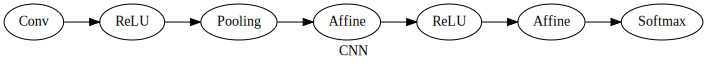

In [4]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="単純なCNNのネットワーク構成")
with dot.subgraph(name="main") as main:
    main.node("L1","Conv")
    main.node("L2","ReLU")
    main.node("L3","Pooling")
    main.node("L4","Affine")
    main.node("L5","ReLU")
    main.node("L6","Affine")
    main.node("L7","Softmax")
    main.edge("L1", "L2",label="")
    main.edge("L2", "L3",label="")
    main.edge("L3", "L4",label="")
    main.edge("L4", "L5",label="")
    main.edge("L5", "L6",label="")
    main.edge("L6", "L7",label="")
    #print(dot)
dot

In [5]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    """単純なConvNet

    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        # Convolution Weight
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        # Affine Weight
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        # Affine Weight
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）

        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル

        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

#### SimpleConvNetの引数

- 初期化の際の重みの標準偏差
- 入力データ（C, H, W）の次元
- Convolution層
    - フィルターの数
    - フィルターのサイズ
    - フィルターのストライド
    - フィルターのパディング
- 隠れ層
    - 全結合ニューロン数
- 出力層
    - 全結合ニューロン数


#### SimpleConvNetにおけるMNIST

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 処理に時間のかかる場合はデータを削減 
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# パラメータの保存
network.save_params("params.pkl")
print("Saved Network Parameters!")

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## CNNの可視化

### 一層目の重みの可視化

一層目は畳み込みフィルタである

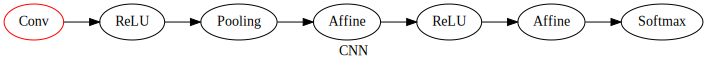

In [2]:
from graphviz import Digraph
dot = Digraph(comment="計算グラフ")
dot.attr(rankdir="LR")
#dot.attr(splines="") #line or curved or ortho or polyline;
dot.attr(fixedsize="true")
dot.attr(label="単純なCNNのネットワーク構成")
with dot.subgraph(name="main") as main:
    main.node("L1","Conv", color="red")
    main.node("L2","ReLU")
    main.node("L3","Pooling")
    main.node("L4","Affine")
    main.node("L5","ReLU")
    main.node("L6","Affine")
    main.node("L7","Softmax")
    main.edge("L1", "L2",label="")
    main.edge("L2", "L3",label="")
    main.edge("L3", "L4",label="")
    main.edge("L4", "L5",label="")
    main.edge("L5", "L6",label="")
    main.edge("L6", "L7",label="")
    #print(dot)
dot

- 畳み込み層の重みとなるフィルタはグレースケールの画像を表現する
    - サイズ（縦・横）: 5 x 5
    - チャンネル(色彩): 1
    - フィルター（数）: 30

学習前


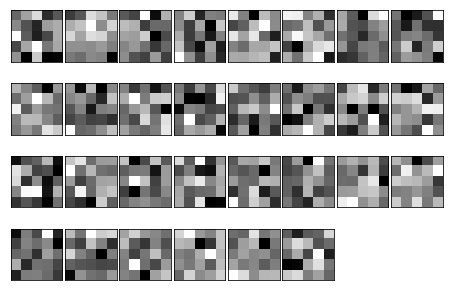

学習後


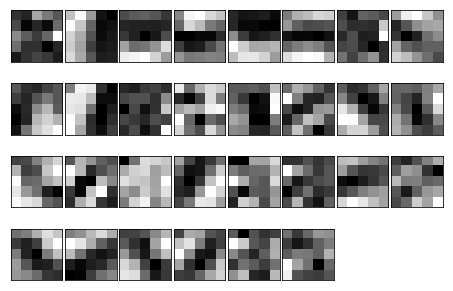

In [4]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# ランダム初期化後の重み
print("学習前")
filter_show(network.params['W1'])
print("学習後")
# 学習後の重み
network.load_params("params.pkl")
filter_show(network.params['W1'])

一様分布で生成されたフィルタが重みの学習後にある程度の偏りを見せていることが確認できる。  
これは画像におけるプリミティブな部分（色が大きく変わる部分や固まって同じ色が続く部分）をフィルタが抽出していることを意味する。

### 階層構造による情報抽出

https://www.kisspng.com/png-deep-learning-convolutional-neural-network-alexnet-3064759/

![https://camo.githubusercontent.com/77c9ad5c0ed0aaeb83e675cd78d6f525cc51f668/687474703a2f2f766973696f6e30332e637361696c2e6d69742e6564752f636e6e5f6172742f646174612f73696e676c655f6c617965722e706e67](https://camo.githubusercontent.com/77c9ad5c0ed0aaeb83e675cd78d6f525cc51f668/687474703a2f2f766973696f6e30332e637361696c2e6d69742e6564752f636e6e5f6172742f646174612f73696e676c655f6c617965722e706e67)

__上記はAlexNetによる例__  

- 1層目はEdge・Blob
- 3層目はTexture
- 5層目はObject Parts
- 全結合層はObject Class


## 代表的なCNN

# LeNet

CNNの元祖

## AlexNet

- ReLUを使用
- LRN(Local Response Normalization)を使う※正規化の走り
- Dropoutを使用

### アルゴリズムは既に存在していたが、ディープラーニング(ビッグデータ)の流行りは以下に支えられている
- 大量のデータを個人でも保存できるディスク容量単価の底下げ
- 大量のデータを個人でもダウンロードできるネットワーク帯域容量単価の底下げ
- 大量のデータを個人でも並列処理できるGPU計算容量単価の底下げ